# BIO312: Myoglobin Structure Visualization

This notebook will help you visualize electrostatic surface potentials and calculate net surface charge for myoglobin proteins.

### Instructions

Run the cells in this notebook from top to bottom by clicking the "Play/Forward Arrow" arrow above. Results from each step will appear just below that step.

This notebook assumes you have already prepared `.pqr` files using `pdb2pqr`.


In [ ]:
# Examine the pqr files and load some variables

import os
import py3Dmol
os.environ['MYGIT'] = os.environ.get('MYGIT')
    
# Directory containing .pqr files
PQR_DIR = '.'  # change to your gene family directory if needed


def list_pqr_files():
    return [f for f in os.listdir(PQR_DIR) if f.endswith('.pqr')]

list_pqr_files()[:10]
#The names of the first 10 .pqr files are shown below.

['NP_001157488.1__AF-P68082-F1-model_v4.pqr',
 'NP_001349775.1__AF-P02144-F1-model_v4.pqr',
 'NP_776306.1__AF-A0A1K0FUF3-F1-model_v4.pqr',
 'XP_003220980.1__AF-G1KST1-F1-model_v4.pqr',
 'XP_003419836.1__AF-G5E7F2-F1-model_v4.pqr',
 'XP_004416152.1__AF-A0A2U3X238-F1-model_v4.pqr',
 'XP_005680660.1__AF-A0A452DWW0-F1-model_v4.pqr',
 'XP_006865290.1__SWM-A0A9B0WSG0-68cb00928d466888a202f809.pqr',
 'XP_026073056.1__AF-A0A6P6KNM0-F1-model_v4.pqr',
 'XP_026102498.1__AF-A0A6P6N1U6-F1-model_v4.pqr']

In [2]:
# FUNCTION to Visualize electrostatic surface (colored by charge)
import os, json
import py3Dmol

PQR_DIR = "."  # change if your files live elsewhere

def show_2x2_grid(pqr_tl, pqr_tr, pqr_bl, pqr_br,
                  label_tl="Top Left", label_tr="Top Right",
                  label_bl="Bottom Left", label_br="Bottom Right",
                  width=900, height=700, zoom_out=0.9):
    """Show 4 PQR structures in a 2x2 grid with electrostatic coloring (charge map)."""
    view = py3Dmol.view(width=width, height=height, viewergrid=(2,2))

    files = [(pqr_tl, 0, 0, label_tl),
             (pqr_tr, 0, 1, label_tr),
             (pqr_bl, 1, 0, label_bl),
             (pqr_br, 1, 1, label_br)]

    for fname, row, col, label in files:
        with open(os.path.join(PQR_DIR, fname)) as fh:
            pdb_block = fh.read()

        # Cartoon backbone + VDW surface colored by atomic partial charge from the PQR
        view.addModel(pdb_block, 'pqr', viewer=(row, col))
        view.setStyle({'cartoon': {'color': 'spectrum'}}, viewer=(row, col))
        view.addSurface(
            py3Dmol.VDW,
            {'opacity': 0.85, 'map': 'charge', 'colorScheme': 'rwb'},
            viewer=(row, col)
        )
        view.addLabel(label,
                      {'fontSize': 14, 'fontColor': 'black',
                       'backgroundColor': 'white', 'showBackground': True},
                      {'model': -1}, viewer=(row, col))
        view.zoomTo(viewer=(row, col))
        if zoom_out != 1.0:
            view.zoom(zoom_out, viewer=(row, col))

    # Try to copy the top-left camera; skip quietly if this py3Dmol build returns a non-serializable object
    try:
        cam = view.getView(viewer=(0,0))
        if isinstance(cam, dict):  # only sync if it's a plain dict
            cam = json.loads(json.dumps(cam))  # ensure JSON-safe
            for rc in [(0,1), (1,0), (1,1)]:
                view.setView(cam, viewer=rc)
    except Exception:
        # Some builds return a custom object here; it's fine to leave views unsynced
        pass

    return view



In [3]:
#Now, visualize the electrostic charges on the 
#YOU NEED TO CHANGE THESE FILE NAMES YOUR OWN GENE FAMILY!

tl = "NP_776306.1__AF-A0A1K0FUF3-F1-model_v4.pqr"      # Bos taurus (terrestrial)
tr = "XP_033721510.1__AF-A0A6J3S3Q6-F1-model_v4.pqr"   # Tursiops truncatus (aquatic)
bl = "NP_001349775.1__AF-P02144-F1-model_v4.pqr"       # Homo sapiens (terrestrial)
br = "XP_068416897.1__AF-P02177-F1-model_v4.pqr"       # Grey whale (aquatic)

view = show_2x2_grid(
    tl, tr, bl, br,
    label_tl="Bos taurus (terrestrial)",
    label_tr="Tursiops truncatus (aquatic)",
    label_bl="Homo sapiens (terrestrial)",
    label_br="Eschrichtius robustus (aquatic)",
    width=900, height=700, zoom_out=0.85
)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Visualizing Electrostatic Charge on Myoglobin Surfaces

In this part of the lab, we’re examining electrostatic charge distributions of myoglobin proteins.

### What the colors mean
We use **py3Dmol** to display the van der Waals surface of the protein, colored by charge values from the `.pqr` files:

- **Blue** = positive charge (basic residues like Lys, Arg, His)  
- **Red** = negative charge (acidic residues like Asp, Glu)  
- **White/grey** = near neutral  

This provides a qualitative picture of where charged residues are positioned on the protein surface.

### Net charge vs. local charge
- **Our calculation:** We’re summing the charges of **all atoms in the protein** (total net charge), not just residues exposed on the surface.  
- **Visualization:** Shows where those charges sit on the 3D protein surface — whether patches are mostly acidic (red) or basic (blue).  

So the **numbers** we compute represent total net charge, while the **colors** highlight where those charges are concentrated on the protein surface.

### What Mirceta et al. (2013) found
Mirceta and colleagues measured **net surface charge** specifically (only residues exposed to solvent).  
They discovered that diving and semi-aquatic mammals evolved **higher positive surface charge** in myoglobin.  

- More Lys/Arg/His residues decorate the protein surface.  
- This adaptation reduces aggregation when myoglobin is packed at very high concentrations in muscle of diving mammals.  

### How to interpret our results
- **Our net charge values** may differ from Mirceta’s scale (0–5) because we include *all* residues, not just surface-exposed ones.  
- Still, comparing **terrestrial vs. aquatic species** should reveal the same general trend: aquatic species are shifted toward higher positive charge.  
- **Visualizations** give a qualitative check: more blue patches on aquatic myoglobins, less on terrestrial ones.  

### Take-home
- Numbers = total net charge per protein (quantitative comparison).  
- Surfaces = distribution of charge patches (visual intuition).  
- Hypothesis: diving mammals will show **higher positive charge**, consistent with their ability to store more myoglobin without aggregation.  


## Brightspace Question #
Which best describes what you are seeing in the PDB visualization?

In [5]:
#Compute net surface charge
import os, re

# Regex: grab the last two floating-point numbers on a line
_float_tail = re.compile(
    r'([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s+([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s*$'
)

def compute_net_charge(pqr_file, base_dir=PQR_DIR):
    """
    Compute net charge from a PQR file by summing charges of ATOM/HETATM lines.
    """
    total_charge = 0.0
    with open(os.path.join(base_dir, pqr_file)) as fh:
        for line in fh:
            if line.startswith(('ATOM', 'HETATM')):
                m = _float_tail.search(line)
                if m:
                    charge = float(m.group(1))  # charge is first of last two floats
                    total_charge += charge
    return total_charge

# Test on one file
compute_net_charge("NP_776306.1__AF-A0A1K0FUF3-F1-model_v4.pqr") #Bos taurus, domestic cattle


-0.9999999999999839

In [6]:
# Compute net charges for all PQRs
charges = {}
for f in list_pqr_files():
    charges[f] = compute_net_charge(f)

list(charges.items())

[('NP_001157488.1__AF-P68082-F1-model_v4.pqr', 1.4155343563970746e-14),
 ('NP_001349775.1__AF-P02144-F1-model_v4.pqr', 1.7708057242771247e-14),
 ('NP_776306.1__AF-A0A1K0FUF3-F1-model_v4.pqr', -0.9999999999999839),
 ('XP_003220980.1__AF-G1KST1-F1-model_v4.pqr', -1.0000000000000013),
 ('XP_003419836.1__AF-G5E7F2-F1-model_v4.pqr', 1.0000000000000195),
 ('XP_004416152.1__AF-A0A2U3X238-F1-model_v4.pqr', 3.000000000000021),
 ('XP_005680660.1__AF-A0A452DWW0-F1-model_v4.pqr', -0.9999999999999839),
 ('XP_006865290.1__SWM-A0A9B0WSG0-68cb00928d466888a202f809.pqr',
  1.0000000000000266),
 ('XP_026073056.1__AF-A0A6P6KNM0-F1-model_v4.pqr', 1.9999999999999698),
 ('XP_026102498.1__AF-A0A6P6N1U6-F1-model_v4.pqr', 1.0000000000000107),
 ('XP_026355400.1__AF-R9RZM3-F1-model_v4.pqr', 1.0000000000000204),
 ('XP_027449767.1__AF-A0A6J2D4H3-F1-model_v4.pqr', 3.0000000000000226),
 ('XP_033721510.1__AF-A0A6J3S3Q6-F1-model_v4.pqr', 2.0000000000000226),
 ('XP_036722853.1__SWM-A0A8C0D084-68d5fdc3c9e66eba1bdf5b0c.pq

,RefSeq,NetCharge,SpeciesAbbr,Status
0,NP_001157488.1,1.415534e-14,Ecab,terrestrial
1,NP_001349775.1,1.770806e-14,Hsap,terrestrial
2,NP_776306.1,-1.000000e+00,Btau,terrestrial
3,XP_003220980.1,-1.000000e+00,Acar,terrestrial
4,XP_003419836.1,1.000000e+00,Lafr,terrestrial
5,XP_004416152.1,3.000000e+00,Oros,aquatic
6,XP_005680660.1,-1.000000e+00,Chir,terrestrial
7,XP_006865290.1,1.000000e+00,Casa,terrestrial
8,XP_026073056.1,2.000000e+00,Caur,aquatic
9,XP_026102498.1,1.000000e+00,Caur,aquatic


Saved CSV results to /home/bio312-user/lab06-key/myoglobin/net_charge_summary.csv
Counts by status:
Status
terrestrial    10
aquatic         7
Name: count, dtype: int64
Saved plot to /home/bio312-user/lab06-key/myoglobin/net_charge_boxplot.png


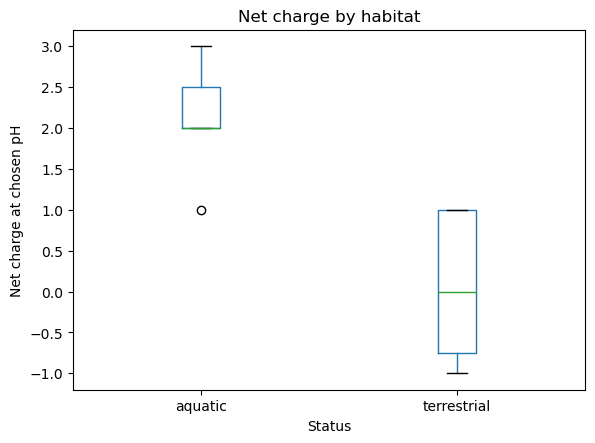

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load species key (must have headers: species_name,abbreviation,taxid,common_name,aquatic)
species_key_path = os.path.expanduser(os.path.expandvars('~/lab06-$MYGIT/species_key.csv'))
species_key = pd.read_csv(species_key_path)
abbr2status = dict(zip(species_key['abbreviation'], species_key['aquatic']))

# 2) Build RefSeq -> species abbreviation map from your lab03 list
lab03_list = os.path.expanduser(os.path.expandvars('~/lab03-$MYGIT/myoglobin/myoglobin.blastp.detail.filtered.out'))
acc2abbr = {}
with open(lab03_list) as fh:
    for line in fh:
        line = line.strip()
        if not line or line.startswith('#'):
            continue
        parts = line.split('|')
        if len(parts) >= 2:
            abbr = parts[0]
            refseq_acc = parts[1]
            acc2abbr[refseq_acc] = abbr

# 3) Assemble charge table using the mapping
rows = []
for f, chg in charges.items():  # 'charges' dict from earlier PQR parsing
    refseq = os.path.basename(f).split('__')[0]  # e.g., "NP_001157488.1"
    abbr = acc2abbr.get(refseq)
    status = abbr2status.get(abbr, 'unknown') if abbr else 'unknown'
    rows.append((refseq, chg, abbr if abbr else 'NA', status))

df = pd.DataFrame(rows, columns=['RefSeq', 'NetCharge', 'SpeciesAbbr', 'Status'])
display(df)

# Save CSV
out_csv = os.path.expanduser(os.path.expandvars('~/lab06-$MYGIT/myoglobin/net_charge_summary.csv'))
df.to_csv(out_csv, index=False)
print(f"Saved CSV results to {out_csv}")

# 4) Quick summary + plot
print("Counts by status:")
print(df['Status'].value_counts(dropna=False))

df_plot = df[df['Status'].isin(['aquatic','terrestrial'])].copy()
ax = df_plot.boxplot(column='NetCharge', by='Status', grid=False)
plt.title("Net charge by habitat")
plt.suptitle("")
plt.ylabel("Net charge at chosen pH")

# Save PNG
out_png = os.path.expanduser(os.path.expandvars('~/lab06-$MYGIT/myoglobin/net_charge_boxplot.png'))
plt.savefig(out_png, dpi=150, bbox_inches='tight')
print(f"Saved plot to {out_png}")

plt.show()


# You are now done working in the Jupyter Notebook.
After checking that the appropriate tables and graphics are saved, you may return to the README.md to continue the lab.